- title: Занятие 5
- author: Kononov Dmitrij
- date: 2023-3-1
- test_link: http://olymp3.vdi.mipt.ru/cgi-bin/new-client?contest_id=10203
- test_comment: Задание №3
- slug: s2_lab05
- ipynb_url: download/s2_lab05.ipynb

# Занятие 5: Графы — обходы графов

## Цель: Освоить на практике алгоритмы обхода графов — обход в глубину и ширину,  алгоритм Косарайю, проверка двудольности

## Алгоритм обхода в глубину
**Алгоритм обхода в глубину** (англ. `depth-first search`, `DFS`) позволяет построить обход ориентированного или неориентированного графа, при котором посещаются все вершины, доступные из начальной вершины.

Результатом алгоритма **обхода в глубину** является некоторый маршрут, следуя которому можно обойти последовательно все вершины графа, доступные из начальной вершины. 

Если граф ориентированный, то обход в глубину строит дерево путей из начальной вершины во все доступные из нее.

Обход в глубину можно представить себе следующим образом:
1.	Пойти в какую-нибудь смежную вершину, не посещенную ранее.
2.	Запустить из этой вершины алгоритм обхода в глубину.
3.	Вернуться в начальную вершину.
4.	Повторить пункты 1-3 для всех не посещенных ранее смежных вершин.

Для реализации алгоритма понадобится отмечать, в каких вершинах был исследователь, а в каких — нет. Пометку можно делать в списке `visited`, где `visited[i] == True` для посещенных вершин, и `visited[i] == false` для непосещенных. Пометка «о посещении вершиных» ставится при заходе в эту вершину.

Алгоритм обхода в глубину можно оформить в виде рекурсивной функции `dfs`, где `start` — номер вершины, из которой запускается обход:

``` python
visited = [False] * n
prev = [None] * n
def dfs(start, visited, prev, g):
    visited[start] = True
    for u in g[start]:
        if not visited[u]:
            prev[u] = start 
            dfs(u, visited, prev, g)
dfs(start, visited, prev, g)
```

В этом алгоритме `n` – число вершин в графе, вершины нумеруются числами от 0 до n-1, а `g[u]` хранит множество вершин смежных с `u`. Для запуска алгоритма, например, для вершины с номером `start` необходимо вызвать функцию `dfs()`. После этого вызова все вершины, доступные из `start`, будут отмечены в списке `visited`, а при помощи списка `prev` можно построить пути из вершины `start` до всех доступных вершин.

**Задание 1** — Для графа, изображенного на рисунке ниже, реализуйте алгоритм обхода в глубину.
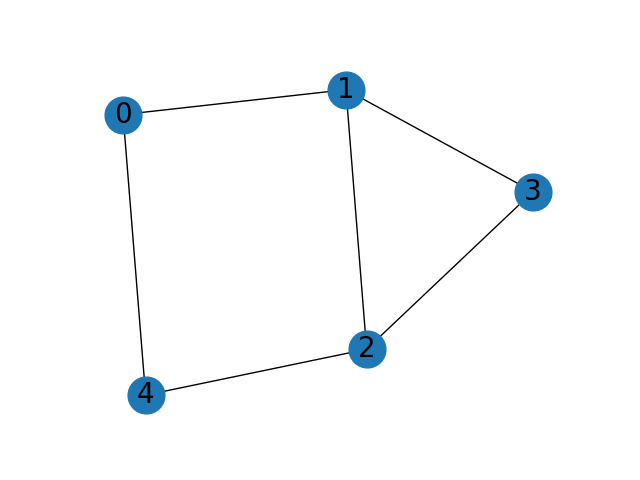

In [13]:
g = [[1, 4], [0, 2, 3], [3, 4], [1, 2], [0, 2]]
n = 5
start = 0

In [16]:
visited = [False] * n
prev = [None] * n
def dfs(start, visited, prev, g):
    visited[start] = True
    for u in g[start]:
        if not visited[u]:
            prev[u] = start 
            dfs(u, visited, prev, g)
dfs(start, visited, prev, g)
print(visited, prev)

[True, True, True, True, True] [None, 0, 1, 2, 2]


## Алгоритм обхода в ширину
**Алгоритм обхода в ширину** (англ. `breadth-first search`, `BFS`) позволяет найти кратчайшие пути из одной вершины невзвешенного (ориентированного или неориентированного) графа до всех остальных вершин. Под кратчайшим путем подразумевается путь, содержащий наименьшее число ребер.

Алгоритм построен на простой идее — пусть до какой-то вершины `u` найдено кратчайшее расстояние и оно равно `d`, а до вершины `v` кратчайшее расстояние не меньше, чем `d`. Тогда если вершины `u` и `v` – смежны, то кратчайшее расстояние до вершины `v` равно `d+1`.

Через `d[i]` будем обозначать кратчайшее расстояние до вершины `i`. Пусть начальная вершина имеет номер `s`, тогда `d[s]=0`. Для всех вершин смежных с `s` расстояние равно `1`, для вершин, смежных с теми, до которых расстояние равно `1`, расстояние равно `2` (если только оно не равно 0 или 1) и т. д.

Таким образом, организовать процесс вычисления кратчайших расстояний до вершин можно следующим образом. Для каждой вершины в массиве `d` будем хранить кратчайшее расстояние до этой вершины, если же расстояние неизвестно — будем хранить значение  `None`. В самом начале расстояние до всех вершин равно `None`, кроме начальной вершины, до которой расстояние равно `0`. Затем перебираем все вершины, до которых расстояние равно `0`, перебираем смежные с ними вершины и для них записываем расстояние равное `1`. Затем перебираем все вершины, до которых расстояние равно `1`, перебираем их соседей, записываем для них расстояние, равное `2` (если оно до этого было равно `None`). Затем перебираем вершины, до которых расстояние было равно 2 и тем самым определяем вершины, до которых расстояние равно `3` и т. д. Этот цикл можно повторять либо пока обнаруживаются новые вершины на очередном шаге, либо `n−1` раз (где `n` – число вершин в графе), так как длина кратчайшего пути в графе не может превосходить `n−1`.

Такая реализация алгоритма будет неэффективной, если на каждом шаге перебирать все вершины, отбирая те, которые были обнаружены на последнем шаге. Для эффективной реализации следует использовать очередь.

В очередь будут закладываться вершины после того, как до них будет определено кратчайшее расстояние. То есть очередь будет содержать вершины, которые были «обнаружены» алгоритмом, но не были рассмотрены исходящие ребра из этих вершин. Можно также сказать, что это очередь на «обработку» вершин.

Из очереди последовательно извлекаются вершины, рассматриваются все исходящие из них ребра. Если ребро ведет в не обнаруженную до этого вершину, то есть расстояние до новой вершины не определено, то оно устанавливается равным на единицу больше, чем расстояние до обрабатываемой вершины, а новая вершина добавляется в конец очереди.

Таким образом, если из очереди извлечена вершина с расстоянием `d`, то в конец очереди будут добавляться вершины с расстоянием `d+1`, то есть в любой момент исполнения алгоритма очередь состоит из вершин, удаленных на расстояние `d`, за которыми следуют вершины, удаленные на расстояние `d+1`:
``` python
D = [None] * n
D[start] = 0
Q = [start]
Qstart = 0
while Qstart < len(Q):
    u = Q[Qstart]
    Qstart += 1 
    for v in g[u]: 
        if D[v] is None: 
            D[v] = D[u] + 1 
            Q.append(v)
```
В этом алгоритме `n` — число вершин в графе, пронумерованных от `0` до `n-1`. Номер начальной вершины (от которой ищутся пути) хранится в переменной `start`. `Q` — очередь, в которой хранятся обрабатываемые элементы (`Qstart` — первый элемент очереди, добавление новой вершины в конец очереди — это вызов метода `append` для списка, удаление вершины из начала очереди — это увеличение `Qstart` на 1 (при этом первый элемент в очереди хранится в `Q[Qstart]`)).

В самом начале в очередь добавляется только один элемент `start`, для которого в самом начале определено расстояние `D[start] = 0` (для всех остальных элементов расстояние не определено). Цикл продолжается пока очередь не пуста (проверяется условием `Qstart < len(Q)`). В цикле из очереди удаляется первый элемент `u`. Затем перебираются все смежные с ним вершины `v`. Если вершина `v` не была обнаружена ранее, что проверяется при помощи условия `D[v] is None`, то расстояние до вершины `v` устанавливается равным расстоянию до вершины `u`, увеличенному на 1, затем вершина v добавляется в конец очереди.

**Задание 2** — Для графа из задания 1 реализуйте алгоритм обхода в ширину.

In [17]:
D = [None] * n
D[start] = 0
Q = [start]
Qstart = 0
while Qstart < len(Q):
    u = Q[Qstart]
    Qstart += 1 
    for v in g[u]: 
        if D[v] is None: 
            D[v] = D[u] + 1 
            Q.append(v)

D

[0, 1, 2, 2, 1]